In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.shape

(5172, 3002)

In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [11]:
df.dropna(how='any',inplace=True)

In [13]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [17]:
from sklearn.metrics import (
    ConfusionMatrixDisplay, confusion_matrix, accuracy_score,
    precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
)


In [19]:
def report(classifier):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    display.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {classifier.__class__.__name__}")
    plt.show()
    
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    
    # New display methods
    PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test)
    plt.title(f"Precision-Recall Curve for {classifier.__class__.__name__}")
    plt.show()
    
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title(f"ROC Curve for {classifier.__class__.__name__}")
    plt.show()


In [21]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=10)

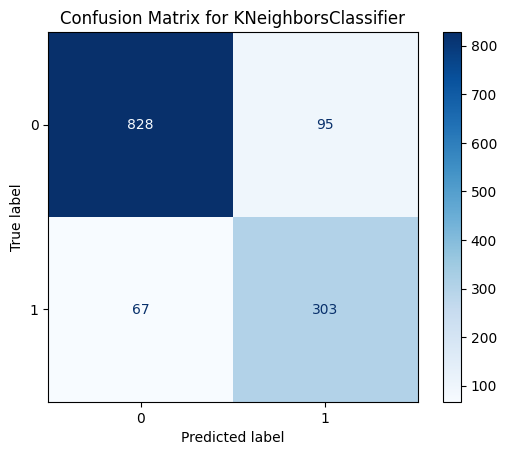

Accuracy:  0.8747
Precision: 0.7613
Recall:    0.8189


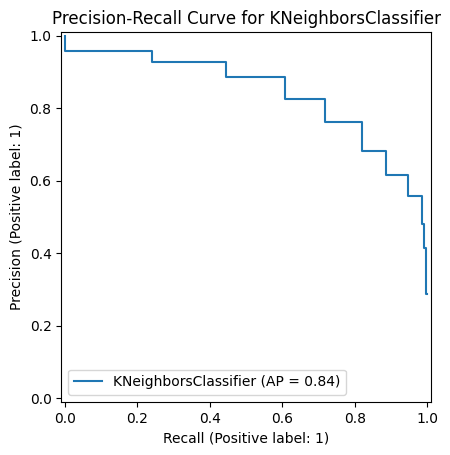

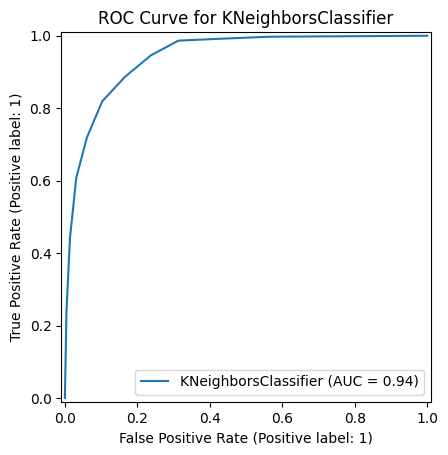

In [23]:
report(kNN)


In [25]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', random_state=10)
svm.fit(x_train, y_train)


SVC(gamma='auto', random_state=10)

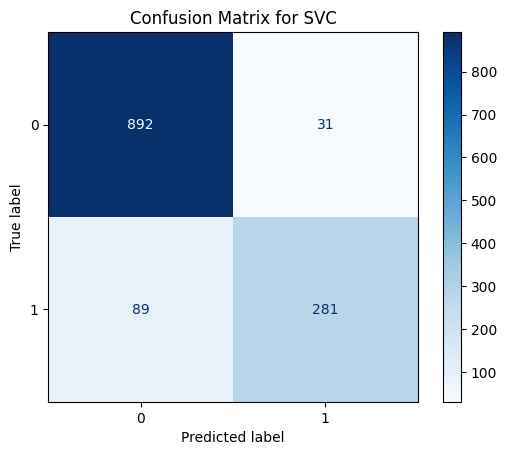

Accuracy:  0.9072
Precision: 0.9006
Recall:    0.7595


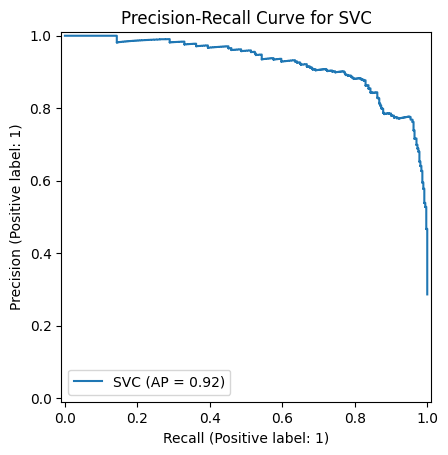

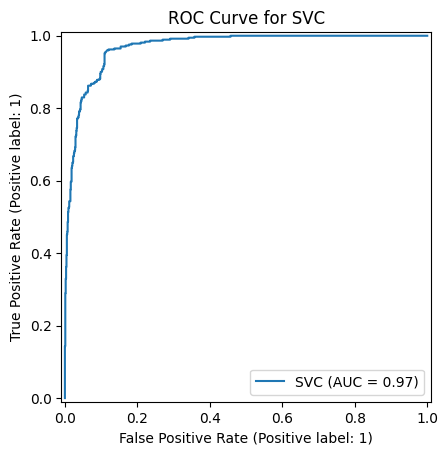

In [26]:
report(svm)
